In [21]:
import pandas as pd
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt


In [22]:
usnr = pd.read_csv("../data/us_natResources_revenue.csv")
usnr = usnr[list(set(usnr.columns) - set(['Offshore Region']))]

In [23]:
usnr.head()

,Land Category,FIPS Code,Land Class,Product,Revenue,Mineral Lease Type,Calendar Year,County,Commodity,Revenue Type,State
0,Onshore,42005.0,Federal,Unprocessed (Wet) Gas,341.47,Oil & Gas,2003,Armstrong,Gas,Royalties,Pennsylvania
1,Onshore,22069.0,Federal,NaN,331.30,Oil & Gas,2003,Natchitoches,Oil & gas (pre-production),Other revenues,Louisiana
2,Onshore,29093.0,Federal,Copper Concentrate,57929.02,Hardrock,2003,Iron,Copper,Royalties,Missouri
3,Onshore,29093.0,Federal,NaN,-51533.57,Hardrock,2003,Iron,Hardrock,Rents,Missouri
4,Onshore,29093.0,Federal,Copper Concentrate,14834.41,Hardrock,2003,Iron,Hardrock,Royalties,Missouri


In [24]:
# clean


In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')


In [26]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

In [27]:
import plotly.express as px
usnr = usnr.dropna(axis=0)
usnr['state code'] = usnr['State'].map(us_state_to_abbrev)

usnr = usnr.dropna(axis=0)

fig = px.choropleth(usnr[['state code', 'Revenue']].groupby("state code").sum().reset_index(), 
                    locations='state code', 
                    color='Revenue', 
                    locationmode='USA-states',
                    scope='usa',
                    range_color=(0, 1000000000),
                    color_continuous_scale="Viridis",
                    title="20 year historical revenue of natural resources by state")

fig.show()

By setting a limit of 1B on the previous chart, we misrepresent the data and actual revenue of New Mexico over the past 20 years (32B). Instead we can plot as a logarithmic curve to further stratify and color distinguish prices. 

Here I have done so, setting the color range as just below and above the maximum logarithmic values. 

In [28]:
data = usnr[['state code', 'Revenue']].groupby("state code").sum().reset_index()

data['Revenue'] = np.log(data['Revenue'])
fig = px.choropleth(data, 
                    locations='state code', 
                    color='Revenue', 
                    locationmode='USA-states',
                    scope='usa',
                    range_color=(data['Revenue'].min() - 1, data['Revenue'].max() + 1),
                    color_continuous_scale="Viridis",
                    title="20 year revenue by state, logarithmically scalled for clearer differentiation")
fig.show()

CDC taken geographic US regions: https://www.cdc.gov/nchs/hus/sources-definitions/geographic-region.htm

In [29]:
us_regions = {
    "New England": [
        "Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont"
    ],
    "Middle Atlantic": [
        "New Jersey", "New York", "Pennsylvania"
    ],
    "East North Central": [
        "Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin"
    ],
    "West North Central": [
        "Iowa", "Kansas", "Minnesota", "Missouri", "Nebraska", "North Dakota", "South Dakota"
    ],
    "South Atlantic": [
        "Delaware", "District of Columbia", "Florida", "Georgia", "Maryland", 
        "North Carolina", "South Carolina", "Virginia", "West Virginia"
    ],
    "East South Central": [
        "Alabama", "Kentucky", "Mississippi", "Tennessee"
    ],
    "West South Central": [
        "Arkansas", "Louisiana", "Oklahoma", "Texas"
    ],
    "Mountain": [
        "Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming"
    ],
    "Pacific": [
        "Alaska", "California", "Hawaii", "Oregon", "Washington"
    ]
}


In [30]:
timeseries_data = usnr[['Calendar Year', 'State', 'Revenue Type', 'Mineral Lease Type', 'Commodity', 'Revenue']].copy()

In [31]:
td = timeseries_data[['Calendar Year', 'State', 'Revenue']].groupby(['Calendar Year', 'State']).sum().reset_index()


In [32]:
# Was trying this out, but is not what I think I want
# td.pivot(index='State', columns='Calendar Year', values='Revenue')

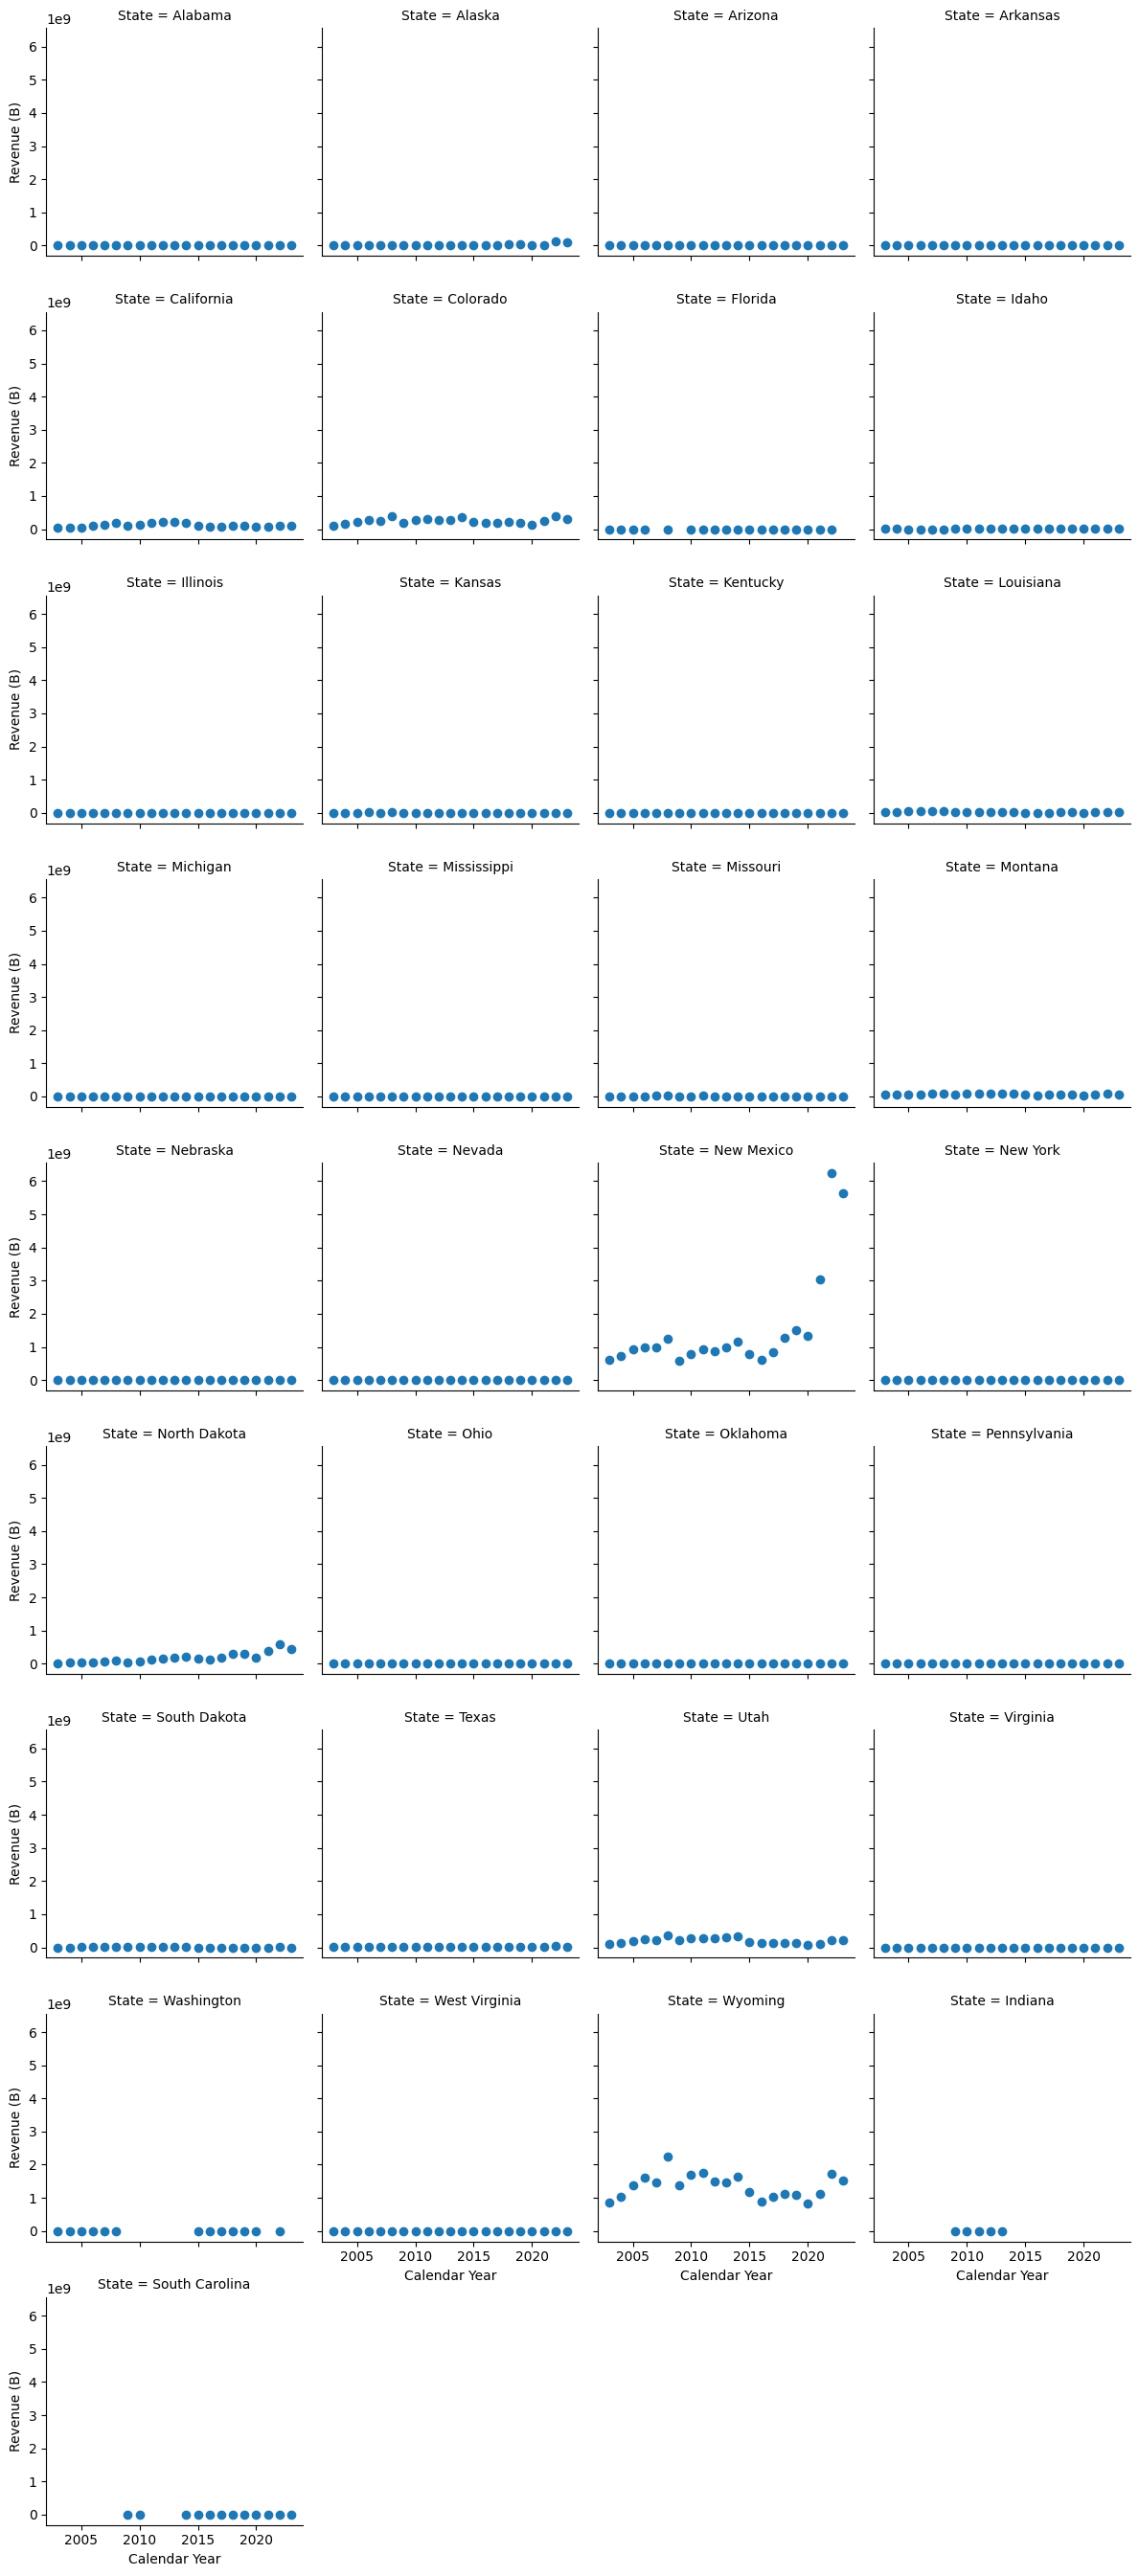

In [33]:
grid = sns.FacetGrid(td, col='State', col_wrap=4)
grid.map(plt.scatter,'Calendar Year', 'Revenue')
grid.set_ylabels("Revenue (B)")

Converting each state into its respective regions, we can also map revenue over time by region. I have chosen to exclude Moutain as New Mexico has a disproportionately high revenue, which is causing other data to appear quite small.

In [34]:
state_to_region = {
    "Connecticut": "New England",
    "Maine": "New England",
    "Massachusetts": "New England",
    "New Hampshire": "New England",
    "Rhode Island": "New England",
    "Vermont": "New England",
    "New Jersey": "Middle Atlantic",
    "New York": "Middle Atlantic",
    "Pennsylvania": "Middle Atlantic",
    "Illinois": "East North Central",
    "Indiana": "East North Central",
    "Michigan": "East North Central",
    "Ohio": "East North Central",
    "Wisconsin": "East North Central",
    "Iowa": "West North Central",
    "Kansas": "West North Central",
    "Minnesota": "West North Central",
    "Missouri": "West North Central",
    "Nebraska": "West North Central",
    "North Dakota": "West North Central",
    "South Dakota": "West North Central",
    "Delaware": "South Atlantic",
    "District of Columbia": "South Atlantic",
    "Florida": "South Atlantic",
    "Georgia": "South Atlantic",
    "Maryland": "South Atlantic",
    "North Carolina": "South Atlantic",
    "South Carolina": "South Atlantic",
    "Virginia": "South Atlantic",
    "West Virginia": "South Atlantic",
    "Alabama": "East South Central",
    "Kentucky": "East South Central",
    "Mississippi": "East South Central",
    "Tennessee": "East South Central",
    "Arkansas": "West South Central",
    "Louisiana": "West South Central",
    "Oklahoma": "West South Central",
    "Texas": "West South Central",
    "Arizona": "Mountain",
    "Colorado": "Mountain",
    "Idaho": "Mountain",
    "Montana": "Mountain",
    "Nevada": "Mountain",
    "New Mexico": "Mountain",
    "Utah": "Mountain",
    "Wyoming": "Mountain",
    "Alaska": "Pacific",
    "California": "Pacific",
    "Hawaii": "Pacific",
    "Oregon": "Pacific",
    "Washington": "Pacific"
}

In [35]:
timeseries_data['region'] = timeseries_data['State'].map(state_to_region)

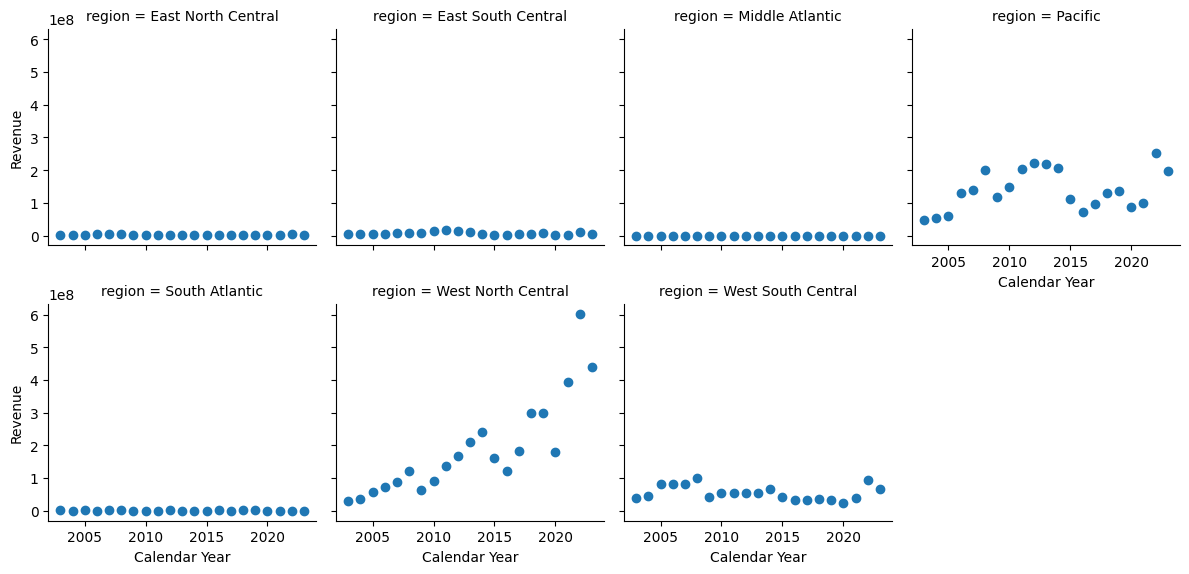

In [36]:
td = timeseries_data.groupby(['Calendar Year', 'region']).sum().reset_index()
# td = td[td['region'] != 'Mountain']
grid = sns.FacetGrid(td[td['region'] != 'Mountain'], col='region', col_wrap=4)
grid.map(plt.scatter,'Calendar Year', 'Revenue')

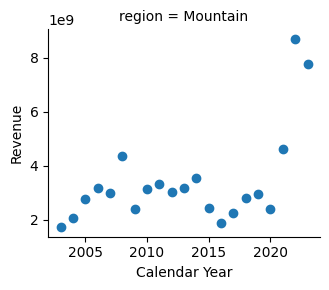

In [37]:
# td = td[td['region'] == 'Mountain']
grid = sns.FacetGrid(td[td['region'] == 'Mountain'], col='region', col_wrap=4)
grid.map(plt.scatter,'Calendar Year', 'Revenue')